<a href="https://colab.research.google.com/github/saikiran2946/mcdonalds/blob/main/mcdonalds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from statsmodels.formula.api import logit

# Load the dataset (replace with the actual file path)
df = pd.read_csv('mcdonalds.csv')

# Inspect the dataset
print(df.head(3))
print(df.columns)
print(df.shape)


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)


In [22]:
df_binary = df.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)
print(df_binary.head(3))


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  


<ipython-input-22-59438e5b2ca6>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)


Explained Variance Ratio:  [0.25556637 0.14834762]


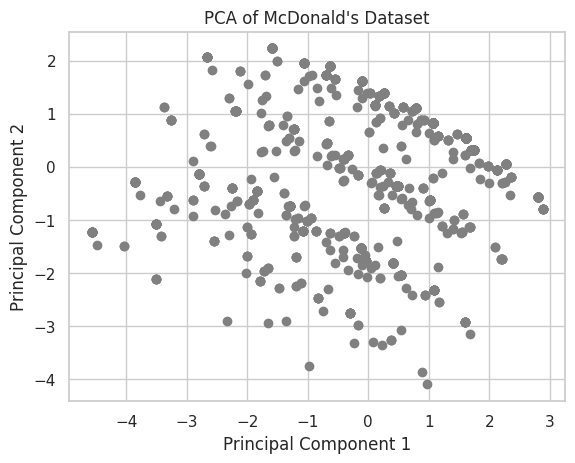

In [23]:
scaler = StandardScaler()
MD_x = scaler.fit_transform(df_binary)
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonald\'s Dataset')
plt.show()


KMeans Labels:  [3 0 0 ... 0 0 2]


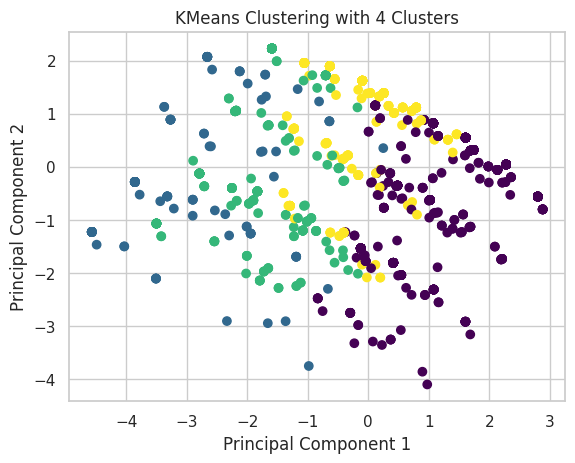

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)
print("KMeans Labels: ", kmeans_labels)
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with 4 Clusters')
plt.show()


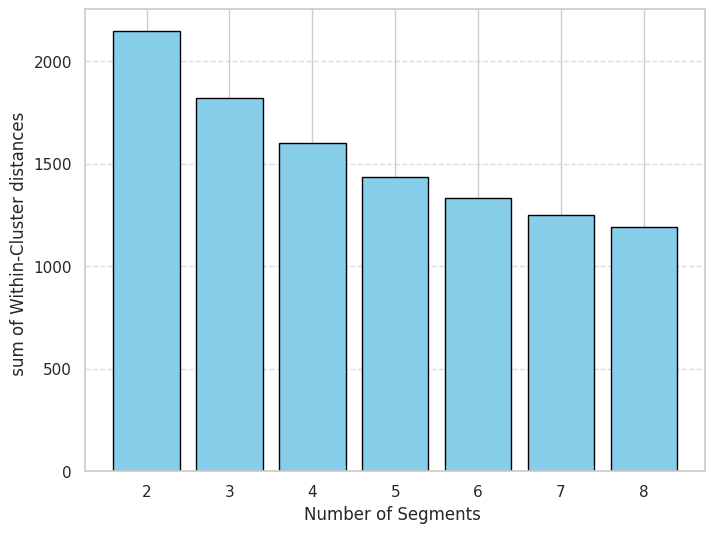

In [30]:
MD_x = (df.iloc[:, 0:11] == "Yes").astype(int)
np.random.seed(1234)
inertia = []
k_values = range(2, 9)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.bar(k_values, inertia, color='skyblue', edgecolor='black')
plt.xlabel("Number of Segments ")
plt.ylabel(" sum of Within-Cluster distances  ")
plt.xticks(k_values)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

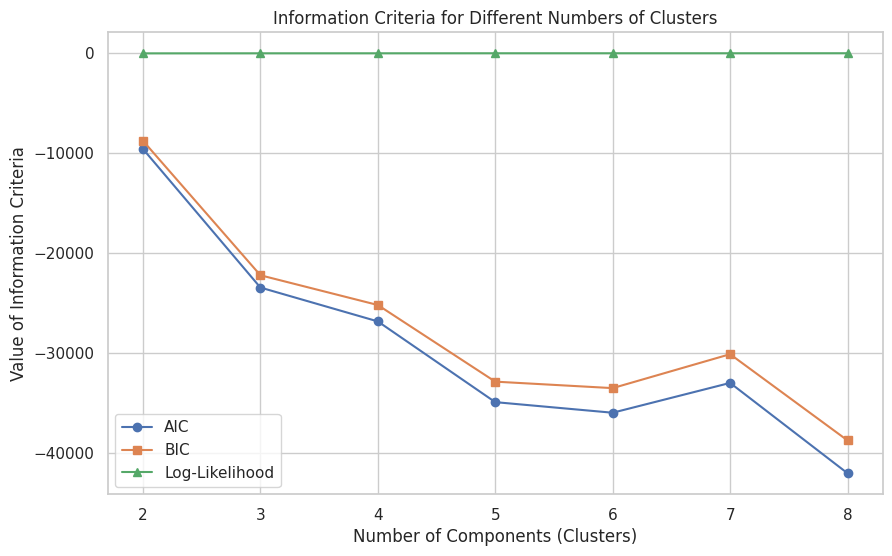

GMM       0    1    2    3
KMeans                    
0       546    0    1   33
1         0  213   11    4
2        46    3  265    8
3        29   38    0  256
Adjusted Rand Index: 0.7174534176092409


In [31]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
aic_values = []
bic_values = []
log_likelihood_values = []

cluster_range = range(2, 9)

for k in cluster_range:
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))
    log_likelihood_values.append(gmm.score(MD_x))

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, aic_values, label='AIC', marker='o')
plt.plot(cluster_range, bic_values, label='BIC', marker='s')
plt.plot(cluster_range, log_likelihood_values, label='Log-Likelihood', marker='^')

plt.title('Information Criteria for Different Numbers of Clusters')
plt.xlabel('Number of Components (Clusters)')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.grid(True)
plt.show()

best_k = 4
gmm_best = GaussianMixture(n_components=best_k, random_state=1234)
gmm_best.fit(MD_x)

kmeans = KMeans(n_clusters=best_k, random_state=1234)
kmeans.fit(MD_x)

gmm_clusters = gmm_best.predict(MD_x)
kmeans_clusters = kmeans.labels_

cross_tab = pd.crosstab(kmeans_clusters, gmm_clusters, rownames=['KMeans'], colnames=['GMM'])
print(cross_tab)

ari = adjusted_rand_score(kmeans_clusters, gmm_clusters)
print(f'Adjusted Rand Index: {ari}')


In [50]:
import pandas as pd
import statsmodels.api as sm
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
mcdonalds = pd.read_csv('mcdonalds.csv')
like_map = {
    "I love it!+5": 1, "+4": 2, "+3": 3, "+2": 4, "+1": 5,
    "0": 6, "-1": 7, "-2": 8, "-3": 9, "-4": 10, "I hate it!-5": 11
}
mcdonalds['Like.n'] = 6 - mcdonalds['Like'].map(like_map)
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
encoder = LabelEncoder()
for feature in features:
    if mcdonalds[feature].dtype == 'object':  # Check if the feature is categorical
        mcdonalds[feature] = encoder.fit_transform(mcdonalds[feature])

X = mcdonalds[features]
gm = GaussianMixture(n_components=2, random_state=1234)
gm.fit(X)
mcdonalds['Segment'] = gm.predict(X)
segments = mcdonalds['Segment'].unique()
coefficients = {}

for segment in segments:
    segment_data = mcdonalds[mcdonalds['Segment'] == segment]
    X_segment = sm.add_constant(segment_data[features])
    y_segment = segment_data['Like.n']

    model = sm.OLS(y_segment, X_segment).fit()
    coefficients[segment] = model.summary()
    print(f"Segment {segment} Regression Summary:\n", model.summary())

Segment 0 Regression Summary:
                             OLS Regression Results                            
Dep. Variable:                 Like.n   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     35.77
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           3.67e-57
Time:                        05:49:30   Log-Likelihood:                -1182.9
No. Observations:                 545   AIC:                             2390.
Df Residuals:                     533   BIC:                             2441.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0641

[[679  11   8  51]
 [  0 123   0   0]
 [  0   0  48 217]
 [  0   0   5 311]]


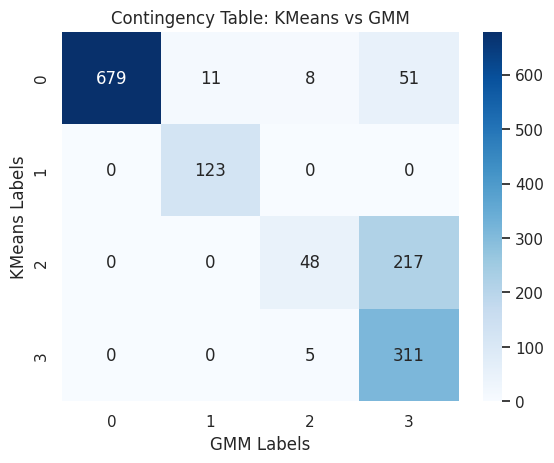

In [25]:
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_labels = gmm.fit_predict(MD_x)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(kmeans_labels, gmm_labels)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(gmm_labels), yticklabels=np.unique(kmeans_labels))
plt.xlabel('GMM Labels')
plt.ylabel('KMeans Labels')
plt.title('Contingency Table: KMeans vs GMM')
plt.show()


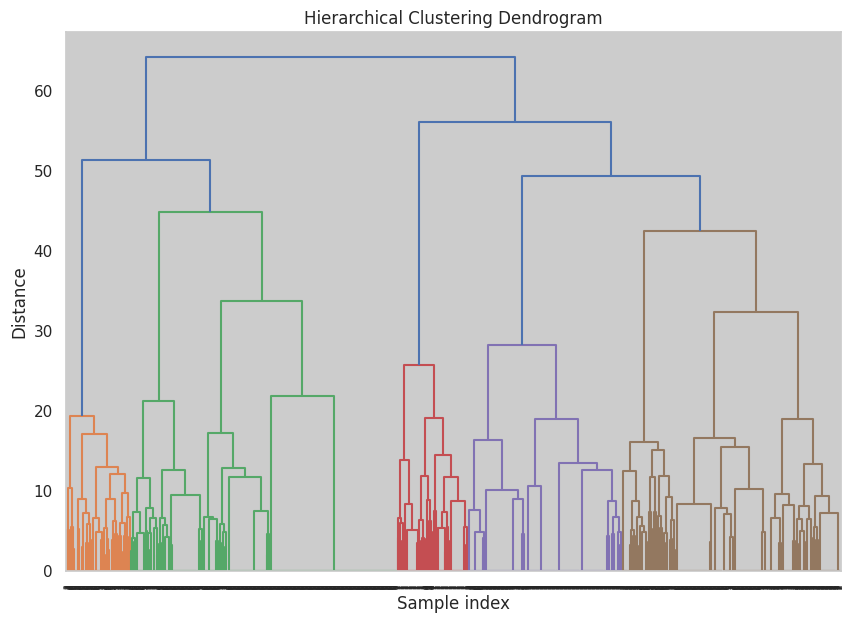

In [26]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
distance_matrix = pdist(MD_x, metric='euclidean')
Z = linkage(distance_matrix, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=kmeans_labels)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


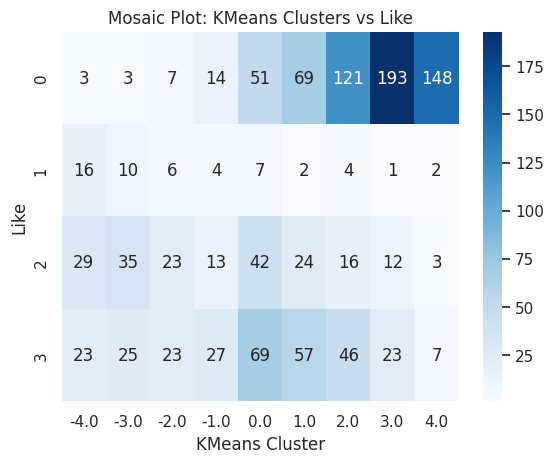

In [16]:
import seaborn as sns
sns.set(style="whitegrid")
mosaic_data = pd.crosstab(kmeans_labels, df['Like'])
sns.heatmap(mosaic_data, annot=True, cmap='Blues', fmt='d')
plt.title('Mosaic Plot: KMeans Clusters vs Like')
plt.xlabel('KMeans Cluster')
plt.ylabel('Like')
plt.show()


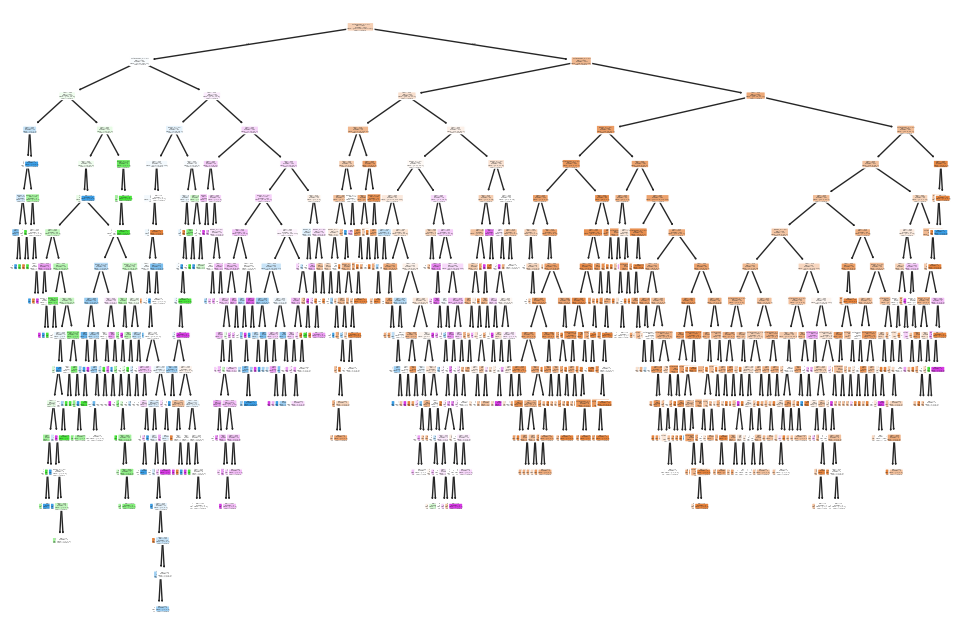

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
visit_frequency_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
df['VisitFrequency_n'] = df['VisitFrequency'].map(visit_frequency_mapping)
le = LabelEncoder()
df['Gender_n'] = le.fit_transform(df['Gender']) # Create a new column for numerical Gender
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(df[['Like_n', 'Age', 'VisitFrequency_n', 'Gender_n']], kmeans_labels)
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=['Like_n', 'Age', 'VisitFrequency_n', 'Gender_n'],
          class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], rounded=True)
plt.show()